# Jugando con datos de audio

La idea de este jupyter es mostrar como cargar y visualizar datos de audio en Python

Para hacer esto utilizaremos la libreria librosa https://anaconda.org/conda-forge/librosa

Y tambien usaremos los datos disponibles en Kaggle de sonidos de gatos y perros https://www.kaggle.com/mmoreaux/audio-cats-and-dogs

In [1]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1- Cargando datos

Lo primero que haremos sera importar solo un archivo de datos. Cuando cargamos un archivo con librosa nos devuelve dos variables

In [2]:
audio, sfreq = lr.load("datasets/cats_dogs/cats_dogs/cat_1.wav")
print(audio)
print(sfreq)

[ 0.00381674  0.00407222  0.00156718 ... -0.0146927  -0.01779636
 -0.01206966]
22050


La primera variable es un array que tiene las muestras de amplitud o cambios de presion en el audio, si esta variabe tuviese mas de dos dimensiones es que se trata de un audio de más de un canal

La segunda variable es el numero de respuestas guardadas por segundo. En este caso tenemos 22050 registros por segundo

### 2. Graficando el audio

Como sabemos el numero de datos por segundo, y asumiendo que no existen datos faltantes entre medio, podemos ordenar los datos en funión del tiempo

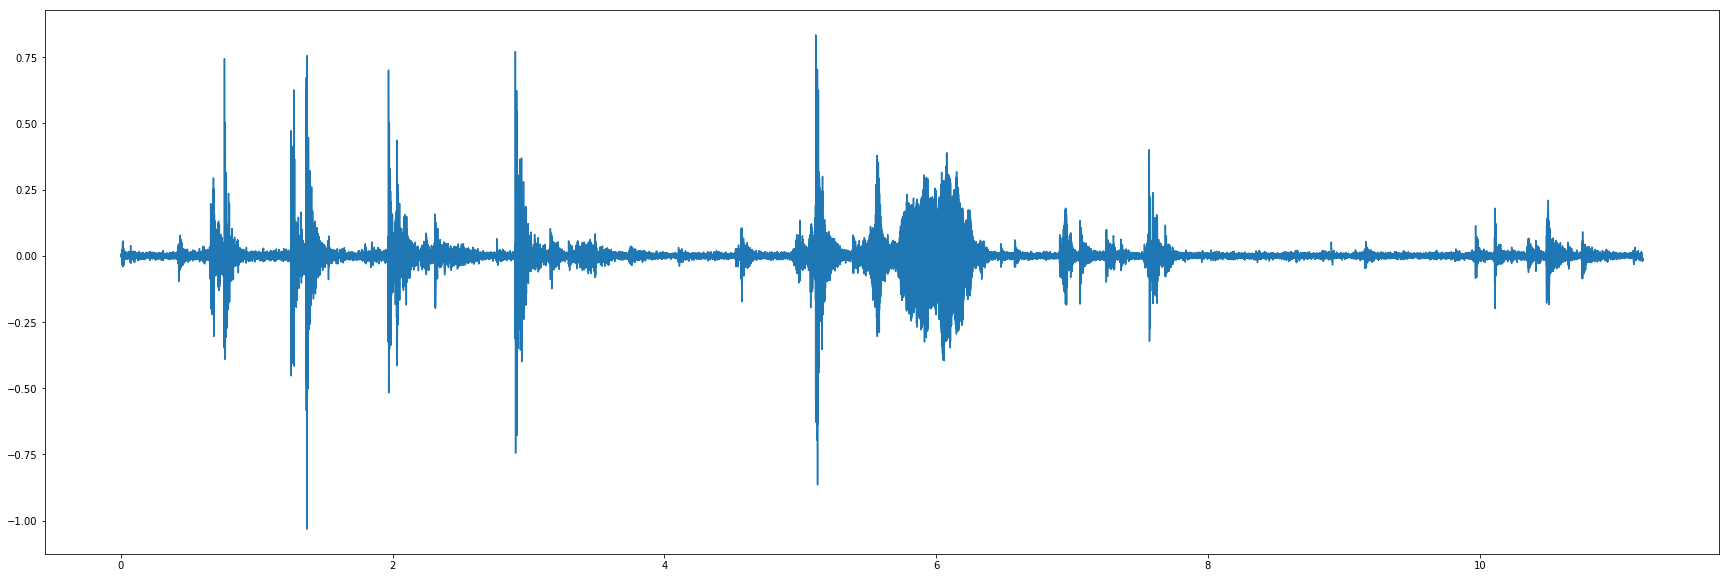

In [3]:
# Array de 0 al largo del vector audio
ixs = np.arange(audio.shape[-1])
# Array de tiempos
tiempo = ixs / sfreq

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(tiempo, audio)

### 3- Describiendo los datos

Obtengamos, en primer lugar, algunas estadisticas básicas de nuestros datos

In [4]:
# Promedio
mean = audio.mean()

# Desviación estandar
std = audio.std()

# Minimo
min_value = audio.min()

# Maximo
max_value = audio.max()

print(mean, std, min_value, max_value)

-4.3073367e-05 0.048502453 -1.0317185 0.83409476


Si bien son las estadisticas clásicas, la idea es extraer el mejor descriptivo de la data

Vamos a suavizar la curva de audio (smoothing data)

In [5]:
# Transformamos a dataframe para usar el metodo rolling
audio = pd.DataFrame(audio)

Para una ventana de tiempo que nostros definimos vamos a calcular el promedio local de los datos de tal manera de poder eliminar el ruido local

In [6]:
ventana = 10000
windowed = audio.rolling(window=ventana)
audio_smooth = windowed.mean()

# Eliminamos nans
audio_smooth.dropna(inplace=True)

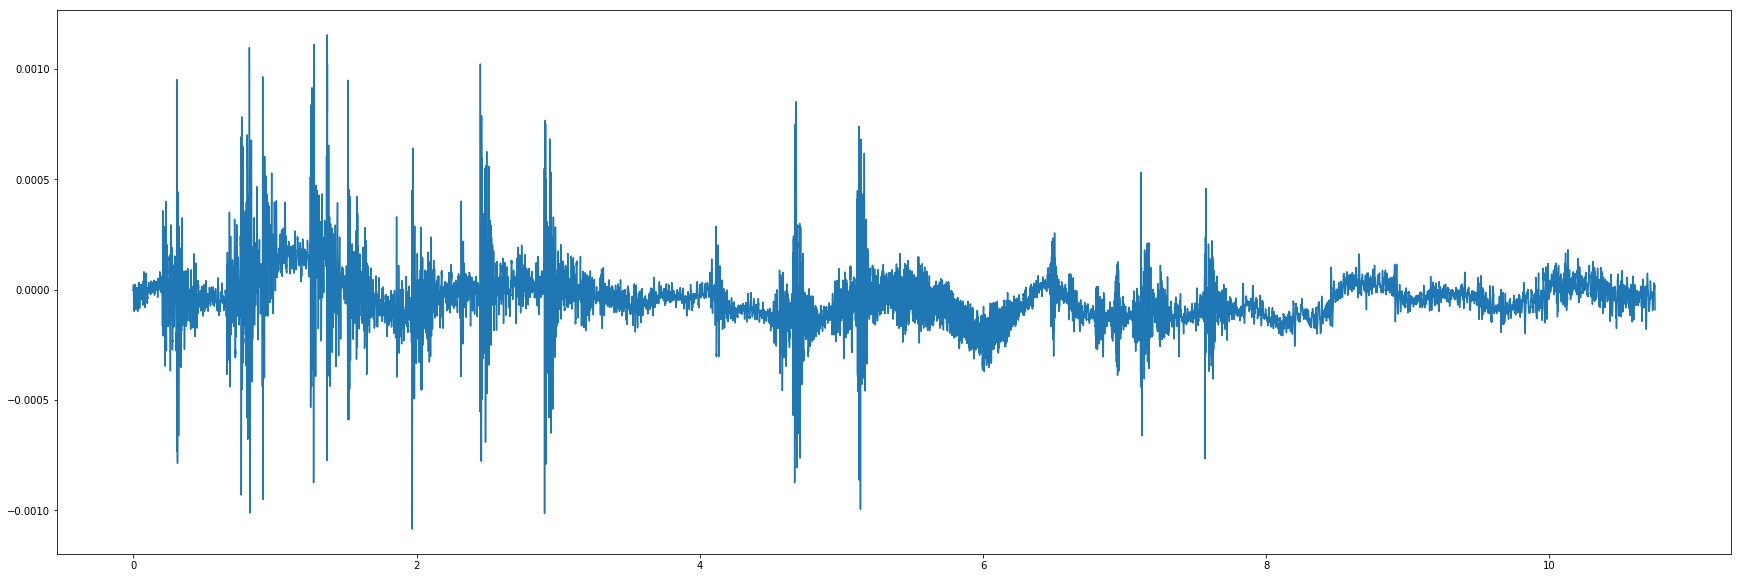

In [7]:
# Array de 0 al largo del vector audio
ixs = np.arange(audio_smooth[0].shape[-1])
# Array de tiempos
tiempo = ixs / sfreq

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(tiempo, audio_smooth)

Ahora podemos ver más claramente el movimiento general de los datos.

### 4- Audio Envelope

El termino Envelope se refiere a como el sonido cambia a través del tiempo

Para calcular esto, se debe primero rectificar la data y luego suavizar. Rectificar la data no es nada mas que encontrar el valor absoluto de esta

In [8]:
# Encontramos el valor absoluto
audio_rectified = audio.apply(np.abs)
# Creamos ventanas temporales
audio_envelope = audio_rectified.rolling(10000).mean()

audio_envelope.dropna(inplace=True)

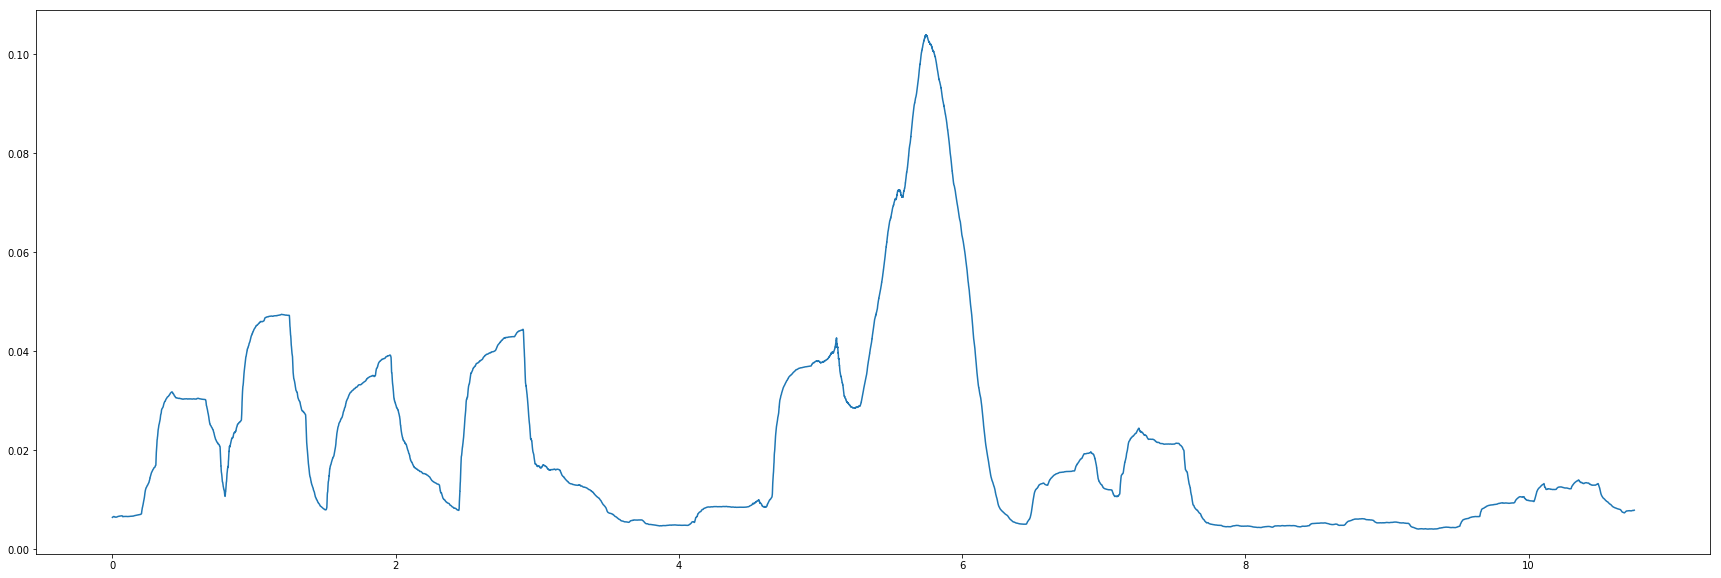

In [9]:
# Array de 0 al largo del vector audio
ixs = np.arange(audio_envelope[0].shape[-1])
# Array de tiempos
tiempo = ixs / sfreq

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(tiempo, audio_envelope)

Podemos tambien obtener las estadisticas clasicas de Envelope

In [10]:
envelope_mean = np.mean(audio_envelope[0])
envelope_std = np.std(audio_envelope[0])
envelope_max = np.max(audio_envelope[0])

print(envelope_mean, envelope_std, envelope_max)

0.020635066245461832 0.019546121566298105 0.10393414815886372
